## Capstone Project - The Battle of Neighborhoods (Week 2)

### Introduction

California is a very popular place for innovation and startup. 41 million population is big enough for market size and we think most people consume coffee daily. We discuss with our investor to open a coffee shop in California. So we explore a popular coffee shop and their location data using data science techniques. 

### Data

We try to take data techniques advantage for making decisions for our business. We'll use California data from Kaggle datasets [here](https://www.kaggle.com/camnugent/california-housing-prices) and Foursquare API. We explore about following.

- The number of coffee shops and popular places.
- Most crowded area of the city and rental prices.
- The popular place in California.

In [1]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation
import requests

#!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
#from IPython.display import Image 
#from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

#!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library
from folium import plugins
from folium.plugins import HeatMap

# import k-means from clustering stage
from sklearn.cluster import KMeans

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt 

import seaborn as sns 

print('Folium installed')
print('Libraries imported.')

Folium installed
Libraries imported.


### Explore for House price in california

California data from Kaggle datasets [here](https://www.kaggle.com/camnugent/california-housing-prices)

In [2]:
ca_house_raw = pd.read_csv('ca_housing.csv')

In [3]:
ca_house_clean = ca_house_raw[['longitude', 'latitude', 'population', 'median_income', 'median_house_value']]

In [4]:
ca_house_mean = ca_house_clean.describe()
ca_house_mean

,longitude,latitude,population,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,1425.476744,3.870671,206855.816909
std,2.003532,2.135952,1132.462122,1.899822,115395.615874
min,-124.350000,32.540000,3.000000,0.499900,14999.000000
25%,-121.800000,33.930000,787.000000,2.563400,119600.000000
50%,-118.490000,34.260000,1166.000000,3.534800,179700.000000
75%,-118.010000,37.710000,1725.000000,4.743250,264725.000000
max,-114.310000,41.950000,35682.000000,15.000100,500001.000000


In [5]:
ca_house_sort = ca_house_clean.sort_values(by=['median_house_value'], ascending=False)
ca_house_sort.head()

,longitude,latitude,population,median_income,median_house_value
10667,-117.88,33.55,772.0,10.1275,500001.0
16916,-122.34,37.57,967.0,7.0422,500001.0
16946,-122.33,37.55,827.0,6.1349,500001.0
8877,-118.49,34.04,859.0,8.0257,500001.0
8878,-118.50,34.04,1143.0,15.0001,500001.0


<function matplotlib.pyplot.show(*args, **kw)>

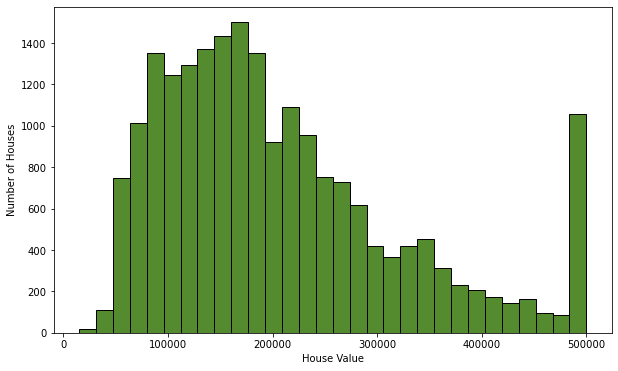

In [6]:
plt.figure(figsize=(10, 6))
plt.hist(ca_house_clean['median_house_value'], bins=30, ec='black', color='#558b2f')
plt.xlabel('House Value')
plt.ylabel('Number of Houses')
plt.show

### Explore crowded area.

In [7]:
ca_house_sort = ca_house_clean.sort_values(by=['population'], ascending=False)
ca_house_sort.head()

,longitude,latitude,population,median_income,median_house_value
15360,-117.42,33.35,35682.0,2.5729,134400.0
9880,-121.79,36.64,28566.0,2.3087,118800.0
13139,-121.44,38.43,16305.0,4.9516,153700.0
10309,-117.74,33.89,16122.0,7.4947,366300.0
6057,-117.78,34.03,15507.0,6.0191,253900.0


In [8]:
ca_value_top = ca_house_sort.iloc[0:100, :]
ca_value_top.head()

,longitude,latitude,population,median_income,median_house_value
15360,-117.42,33.35,35682.0,2.5729,134400.0
9880,-121.79,36.64,28566.0,2.3087,118800.0
13139,-121.44,38.43,16305.0,4.9516,153700.0
10309,-117.74,33.89,16122.0,7.4947,366300.0
6057,-117.78,34.03,15507.0,6.0191,253900.0


### Explore Silicon Valley location and crowded population area.

In [9]:
address = 'Silicon Valley, CA'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

37.4429964 -122.1545229


In [10]:
ca_value_map = folium.Map(location=[latitude, longitude], zoom_start=10) # generate map centred around the California

# add a red circle marker to represent the Blue Bottle Coffee
folium.CircleMarker(
    [latitude, longitude],
    radius=5,
    color='red',
    popup='Blue Bottle Coffee',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(ca_value_map)

for lat, lng, label in zip(ca_value_top.latitude, ca_value_top.longitude, ca_value_top.population	):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(ca_value_map)

# display map
ca_value_map

### Explore Coffee Shop

In [11]:
search_query = 'Coffee'
radius = 1000
print(search_query + ' .... OK!')

Coffee .... OK!


In [12]:
# @hidden_cell
CLIENT_ID = 'QSCFKUJJJULDJXUDMJZCO1RNBEW3B4SGZTGE5U5ZPYNUIZQT' # your Foursquare ID
CLIENT_SECRET = 'UNZXLBHIWWQT2NNCOYM5WGK3EA3MZT0NGJ332FQE1LJUNLI0' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30

In [13]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=QSCFKUJJJULDJXUDMJZCO1RNBEW3B4SGZTGE5U5ZPYNUIZQT&client_secret=UNZXLBHIWWQT2NNCOYM5WGK3EA3MZT0NGJ332FQE1LJUNLI0&ll=37.4429964,-122.1545229&v=20180604&query=Coffee&radius=1000&limit=30'

In [14]:
results = requests.get(url).json()

In [15]:
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

,id,name,categories,referralId,hasPerk,location.address,location.crossStreet,location.lat,location.lng,location.labeledLatLngs,...,location.country,location.formattedAddress,location.neighborhood,delivery.id,delivery.url,delivery.provider.name,delivery.provider.icon.prefix,delivery.provider.icon.sizes,delivery.provider.icon.name,venuePage.id
0,4a8c1d07f964a520ff0c20e3,Peet's Coffee & Tea,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",v-1593095250,False,"153 Homer Avenue,",at High St,37.441906,-122.159748,"[{'label': 'display', 'lat': 37.441906, 'lng':...",...,United States,"[153 Homer Avenue, (at High St), Palo Alto, CA...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4dd1580eb3adb047f5024231,Philz Coffee,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",v-1593095250,False,101 Forest Ave,at Alma St,37.442216,-122.161660,"[{'label': 'display', 'lat': 37.44221552692198...",...,United States,"[101 Forest Ave (at Alma St), Palo Alto, CA 94...",University South,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5509ce59498ef5f682b1c2d9,Blue Bottle Coffee,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",v-1593095250,False,456 University Ave,at Kipling St,37.447485,-122.159409,"[{'label': 'display', 'lat': 37.44748492121728...",...,United States,"[456 University Ave (at Kipling St), Palo Alto...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,58a5d1a6102f475f7cb4ddbb,WFM Coffee Bar,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",v-1593095250,False,774 Emerson St,NaN,37.442266,-122.159246,"[{'label': 'display', 'lat': 37.4422655194481,...",...,United States,"[774 Emerson St, Palo Alto, CA 94301, United S...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4a47ea14f964a52049aa1fe3,Peet's Coffee & Tea,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",v-1593095250,False,"436 University Ave,",NaN,37.447517,-122.159839,"[{'label': 'display', 'lat': 37.447517, 'lng':...",...,United States,"[436 University Ave,, Palo Alto, CA 94301, Uni...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
dataframe.to_csv('dataframe.csv')

In [17]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered

,name,categories,address,crossStreet,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,neighborhood,id
0,Peet's Coffee & Tea,Coffee Shop,"153 Homer Avenue,",at High St,37.441906,-122.159748,"[{'label': 'display', 'lat': 37.441906, 'lng':...",477,94301,US,Palo Alto,CA,United States,"[153 Homer Avenue, (at High St), Palo Alto, CA...",NaN,4a8c1d07f964a520ff0c20e3
1,Philz Coffee,Coffee Shop,101 Forest Ave,at Alma St,37.442216,-122.161660,"[{'label': 'display', 'lat': 37.44221552692198...",636,94301,US,Palo Alto,CA,United States,"[101 Forest Ave (at Alma St), Palo Alto, CA 94...",University South,4dd1580eb3adb047f5024231
2,Blue Bottle Coffee,Coffee Shop,456 University Ave,at Kipling St,37.447485,-122.159409,"[{'label': 'display', 'lat': 37.44748492121728...",660,94301,US,Palo Alto,CA,United States,"[456 University Ave (at Kipling St), Palo Alto...",NaN,5509ce59498ef5f682b1c2d9
3,WFM Coffee Bar,Coffee Shop,774 Emerson St,NaN,37.442266,-122.159246,"[{'label': 'display', 'lat': 37.4422655194481,...",425,94301,US,Palo Alto,CA,United States,"[774 Emerson St, Palo Alto, CA 94301, United S...",NaN,58a5d1a6102f475f7cb4ddbb
4,Peet's Coffee & Tea,Coffee Shop,"436 University Ave,",NaN,37.447517,-122.159839,"[{'label': 'display', 'lat': 37.447517, 'lng':...",688,94301,US,Palo Alto,CA,United States,"[436 University Ave,, Palo Alto, CA 94301, Uni...",NaN,4a47ea14f964a52049aa1fe3
5,Peet's Coffee & Tea,Coffee Shop,"77 Town & Country,",NaN,37.438061,-122.159320,"[{'label': 'display', 'lat': 37.438061, 'lng':...",693,94301,US,Palo Alto,CA,United States,"[77 Town & Country,, Palo Alto, CA 94301, Unit...",NaN,5227b1b08bfdf21a788fbecf
6,Verve Coffee,Café,162 University Ave,Emerson St,37.444206,-122.163055,"[{'label': 'display', 'lat': 37.4442062, 'lng'...",766,94301,US,Palo Alto,CA,United States,"[162 University Ave (Emerson St), Palo Alto, C...",NaN,5d01b7e8d552c7002ce1fde0
7,JM Coffee,Café,540 Bryant St,NaN,37.445244,-122.161003,"[{'label': 'display', 'lat': 37.44524383544922...",624,94301,US,Palo Alto,CA,United States,"[540 Bryant St, Palo Alto, CA 94301, United St...",NaN,536cd95e498e613f0b534713
8,Espresso Bettola Coffee House,Food,115 Hamilton Ave,NaN,37.442986,-122.162689,"[{'label': 'display', 'lat': 37.44298553466797...",721,94301,US,Palo Alto,CA,United States,"[115 Hamilton Ave, Palo Alto, CA 94301, United...",NaN,4f325c0f19836c91c7d00d77
9,Da Coffee Spot,Coffee Shop,235 University Ave,NaN,37.445199,-122.162321,"[{'label': 'display', 'lat': 37.445199, 'lng':...",731,94301,US,Palo Alto,CA,United States,"[235 University Ave, Palo Alto, CA 94301, Unit...",NaN,4f327f8c19836c91c7ddac9c


In [18]:
dataframe_filtered.name

0               Peet's Coffee & Tea
1                      Philz Coffee
2                Blue Bottle Coffee
3                    WFM Coffee Bar
4               Peet's Coffee & Tea
5               Peet's Coffee & Tea
6                      Verve Coffee
7                         JM Coffee
8     Espresso Bettola Coffee House
9                    Da Coffee Spot
10                      good coffee
11                        Starbucks
Name: name, dtype: object

#### Finding best rating coffee shop

In [19]:
venue_id = '5509ce59498ef5f682b1c2d9'
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)

result = requests.get(url).json()
try:
    print(result['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')

9.1


Blue Bottle Coffee has hightest rating

In [20]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=14) # generate map centred around the Blue Bottle Coffee

# add a red circle marker to represent the Blue Bottle Coffee
folium.CircleMarker(
    [latitude, longitude],
    radius=5,
    color='red',
    popup='Blue Bottle Coffee',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

# add the Coffee shop as brown circle markers
for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='brown',
        popup=label,
        fill = True,
        fill_color='brown',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map

### Explore Neighborhoods

In [21]:
# type your answer here
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, 
    longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=QSCFKUJJJULDJXUDMJZCO1RNBEW3B4SGZTGE5U5ZPYNUIZQT&client_secret=UNZXLBHIWWQT2NNCOYM5WGK3EA3MZT0NGJ332FQE1LJUNLI0&v=20180604&ll=37.4429964,-122.1545229&radius=500&limit=100'

In [22]:
results = requests.get(url).json()

In [23]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [24]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,HP Garage,Historic Site,37.442889,-122.154577
1,Heritage Park,Park,37.444075,-122.157028
2,Taverna,Greek Restaurant,37.442301,-122.159034
3,uforia studios,Gym / Fitness Center,37.442819,-122.158030
4,Watercourse Way,Spa,37.441199,-122.158527


In [25]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

13 venues were returned by Foursquare.


Rename column title 

In [26]:
ca_data = nearby_venues.rename(columns={"name": "Name", "categories": "Neighborhood", "lat": "Latitude", "lng": "Longitude"})
ca_data.head()

,Name,Neighborhood,Latitude,Longitude
0,HP Garage,Historic Site,37.442889,-122.154577
1,Heritage Park,Park,37.444075,-122.157028
2,Taverna,Greek Restaurant,37.442301,-122.159034
3,uforia studios,Gym / Fitness Center,37.442819,-122.158030
4,Watercourse Way,Spa,37.441199,-122.158527


In [27]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [28]:
# type your answer here
ca_venues = getNearbyVenues(names=ca_data['Neighborhood'],
                                   latitudes=ca_data['Latitude'],
                                   longitudes=ca_data['Longitude'])

Historic Site
Park
Greek Restaurant
Gym / Fitness Center
Spa
Grocery Store
Diner
American Restaurant
Hotel
Spa
Construction & Landscaping
Elementary School
Antique Shop


In [29]:
print(ca_venues.shape)
ca_venues.head()

(792, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Historic Site,37.442889,-122.154577,HP Garage,37.442889,-122.154577,Historic Site
1,Historic Site,37.442889,-122.154577,Heritage Park,37.444075,-122.157028,Park
2,Historic Site,37.442889,-122.154577,Taverna,37.442301,-122.159034,Greek Restaurant
3,Historic Site,37.442889,-122.154577,uforia studios,37.442819,-122.158030,Gym / Fitness Center
4,Historic Site,37.442889,-122.154577,Watercourse Way,37.441199,-122.158527,Spa


In [30]:
ca_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
American Restaurant,93,93,93,93,93,93
Antique Shop,53,53,53,53,53,53
Construction & Landscaping,10,10,10,10,10,10
Diner,95,95,95,95,95,95
Elementary School,13,13,13,13,13,13
Greek Restaurant,97,97,97,97,97,97
Grocery Store,98,98,98,98,98,98
Gym / Fitness Center,70,70,70,70,70,70
Historic Site,13,13,13,13,13,13


In [31]:
print('There are {} uniques categories.'.format(len(ca_venues['Venue Category'].unique())))

There are 96 uniques categories.


### Analyze Neighborhood

In [32]:
# one hot encoding
ca_onehot = pd.get_dummies(ca_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
ca_onehot['Neighborhood'] = ca_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [ca_onehot.columns[-1]] + list(ca_onehot.columns[:-1])
ca_onehot = ca_onehot[fixed_columns]

ca_onehot.head()

,Neighborhood,Accessories Store,American Restaurant,Antique Shop,Art Gallery,Arts & Crafts Store,Asian Restaurant,BBQ Joint,Bakery,Bank,...,Taco Place,Tea Room,Thai Restaurant,Theater,Toy / Game Store,Train Station,Vietnamese Restaurant,Wine Bar,Women's Store,Yoga Studio
0,Historic Site,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Historic Site,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Historic Site,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Historic Site,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Historic Site,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
ca_grouped = ca_onehot.groupby('Neighborhood').mean().reset_index()
ca_grouped

,Neighborhood,Accessories Store,American Restaurant,Antique Shop,Art Gallery,Arts & Crafts Store,Asian Restaurant,BBQ Joint,Bakery,Bank,...,Taco Place,Tea Room,Thai Restaurant,Theater,Toy / Game Store,Train Station,Vietnamese Restaurant,Wine Bar,Women's Store,Yoga Studio
0,American Restaurant,0.010753,0.021505,0.010753,0.010753,0.010753,0.010753,0.000000,0.021505,0.010753,...,0.010753,0.010753,0.000000,0.000000,0.010753,0.010753,0.010753,0.010753,0.010753,0.021505
1,Antique Shop,0.000000,0.018868,0.000000,0.000000,0.018868,0.018868,0.000000,0.037736,0.018868,...,0.000000,0.000000,0.000000,0.000000,0.018868,0.000000,0.000000,0.000000,0.018868,0.018868
2,Construction & Landscaping,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,Diner,0.000000,0.021053,0.010526,0.010526,0.010526,0.010526,0.010526,0.021053,0.010526,...,0.010526,0.000000,0.010526,0.000000,0.010526,0.010526,0.000000,0.010526,0.010526,0.021053
4,Elementary School,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.153846,0.000000,0.000000,0.000000,0.000000,0.076923,0.000000
5,Greek Restaurant,0.010309,0.020619,0.010309,0.010309,0.010309,0.010309,0.000000,0.020619,0.010309,...,0.010309,0.010309,0.000000,0.000000,0.010309,0.010309,0.010309,0.010309,0.010309,0.020619
6,Grocery Store,0.010204,0.020408,0.010204,0.010204,0.010204,0.010204,0.000000,0.020408,0.010204,...,0.010204,0.010204,0.000000,0.000000,0.010204,0.010204,0.010204,0.010204,0.010204,0.020408
7,Gym / Fitness Center,0.000000,0.014286,0.014286,0.014286,0.000000,0.014286,0.000000,0.014286,0.000000,...,0.014286,0.014286,0.000000,0.000000,0.014286,0.000000,0.014286,0.014286,0.000000,0.028571
8,Historic Site,0.000000,0.076923,0.076923,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,Hotel,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.043478,0.043478,0.000000,0.000000


In [34]:
num_top_venues = 5

for hood in ca_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = ca_grouped[ca_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----American Restaurant----
                  venue  freq
0                  Café  0.05
1  Gym / Fitness Center  0.03
2        Ice Cream Shop  0.03
3           Coffee Shop  0.03
4                   Spa  0.03


----Antique Shop----
          venue  freq
0   Coffee Shop  0.08
1           Spa  0.06
2        Bakery  0.04
3          Park  0.04
4  Burger Joint  0.04


----Construction & Landscaping----
                        venue  freq
0                     Theater   0.2
1                Intersection   0.1
2  Construction & Landscaping   0.1
3                Home Service   0.1
4               Historic Site   0.1


----Diner----
                  venue  freq
0           Coffee Shop  0.04
1  Gym / Fitness Center  0.03
2                 Hotel  0.03
3             Juice Bar  0.03
4                   Spa  0.03


----Elementary School----
                        venue  freq
0                     Theater  0.15
1                Intersection  0.08
2               Historic Site  0.08
3  Construction 

In [35]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [36]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = ca_grouped['Neighborhood']

for ind in np.arange(ca_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(ca_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,American Restaurant,Café,Spa,Ice Cream Shop,Gym / Fitness Center,Coffee Shop,Yoga Studio,French Restaurant,Juice Bar,Israeli Restaurant,Grocery Store
1,Antique Shop,Coffee Shop,Spa,Pizza Place,Burger Joint,Grocery Store,Gym / Fitness Center,Park,Bakery,Yoga Studio,Cosmetics Shop
2,Construction & Landscaping,Theater,Historic Site,Intersection,Park,Nightlife Spot,Campground,Elementary School,Construction & Landscaping,Home Service,Gift Shop
3,Diner,Coffee Shop,Café,Spa,Juice Bar,Gym / Fitness Center,Hotel,Burger Joint,Bubble Tea Shop,Clothing Store,Sandwich Place
4,Elementary School,Theater,Hotel,Campground,Historic Site,Home Service,Women's Store,Intersection,Elementary School,Nightlife Spot,Park


In [37]:
neighborhoods_venues_sorted.to_csv('neighborhoods_venues_sorted.csv')

### Cluster Neighborhoods
##### Run k-means to cluster the neighborhood into 5 clusters.

In [38]:
# set number of clusters
kclusters = 5

ca_grouped_clustering = ca_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(ca_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 0, 2, 0, 4, 0, 0, 0, 3, 1])

In [39]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

ca_merged = ca_data

# merge ca_grouped with ca_data to add latitude/longitude for each neighborhood
ca_merged = ca_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

ca_merged.head() # check the last columns!

,Name,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,HP Garage,Historic Site,37.442889,-122.154577,3,Spa,Hotel,Gym / Fitness Center,Grocery Store,Greek Restaurant,Elementary School,Diner,Park,Construction & Landscaping,Historic Site
1,Heritage Park,Park,37.444075,-122.157028,0,Coffee Shop,Hotel,French Restaurant,Spa,Diner,Electronics Store,Café,Greek Restaurant,Movie Theater,Juice Bar
2,Taverna,Greek Restaurant,37.442301,-122.159034,0,Café,Ice Cream Shop,Pizza Place,Spa,Gym / Fitness Center,Coffee Shop,French Restaurant,Juice Bar,Israeli Restaurant,Grocery Store
3,uforia studios,Gym / Fitness Center,37.442819,-122.158030,0,Café,Spa,Gym / Fitness Center,Ice Cream Shop,Yoga Studio,Clothing Store,Diner,Electronics Store,French Restaurant,Grocery Store
4,Watercourse Way,Spa,37.441199,-122.158527,0,Café,Coffee Shop,Gym / Fitness Center,Hotel,Spa,Ice Cream Shop,Juice Bar,American Restaurant,Clothing Store,Diner


In [40]:
ca_merged.to_csv('ca_merged.csv')

In [41]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=15)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(ca_merged['Latitude'], ca_merged['Longitude'], ca_merged['Neighborhood'], ca_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Examine Clusters

In [42]:
ca_merged.loc[ca_merged['Cluster Labels'] == 0, ca_merged.columns[[1] + list(range(5, ca_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Park,Coffee Shop,Hotel,French Restaurant,Spa,Diner,Electronics Store,Café,Greek Restaurant,Movie Theater,Juice Bar
2,Greek Restaurant,Café,Ice Cream Shop,Pizza Place,Spa,Gym / Fitness Center,Coffee Shop,French Restaurant,Juice Bar,Israeli Restaurant,Grocery Store
3,Gym / Fitness Center,Café,Spa,Gym / Fitness Center,Ice Cream Shop,Yoga Studio,Clothing Store,Diner,Electronics Store,French Restaurant,Grocery Store
4,Spa,Café,Coffee Shop,Gym / Fitness Center,Hotel,Spa,Ice Cream Shop,Juice Bar,American Restaurant,Clothing Store,Diner
5,Grocery Store,Café,Ice Cream Shop,Pizza Place,Spa,Gym / Fitness Center,Coffee Shop,French Restaurant,Juice Bar,Israeli Restaurant,Grocery Store
6,Diner,Coffee Shop,Café,Spa,Juice Bar,Gym / Fitness Center,Hotel,Burger Joint,Bubble Tea Shop,Clothing Store,Sandwich Place
7,American Restaurant,Café,Spa,Ice Cream Shop,Gym / Fitness Center,Coffee Shop,Yoga Studio,French Restaurant,Juice Bar,Israeli Restaurant,Grocery Store
9,Spa,Café,Coffee Shop,Gym / Fitness Center,Hotel,Spa,Ice Cream Shop,Juice Bar,American Restaurant,Clothing Store,Diner
12,Antique Shop,Coffee Shop,Spa,Pizza Place,Burger Joint,Grocery Store,Gym / Fitness Center,Park,Bakery,Yoga Studio,Cosmetics Shop


In [43]:
ca_merged.loc[ca_merged['Cluster Labels'] == 1, ca_merged.columns[[1] + list(range(5, ca_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
8,Hotel,French Restaurant,Electronics Store,Coffee Shop,Hotel,Salad Place,Historic Site,Intersection,Elementary School,Japanese Restaurant,Mexican Restaurant


In [44]:
ca_merged.loc[ca_merged['Cluster Labels'] == 2, ca_merged.columns[[1] + list(range(5, ca_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
10,Construction & Landscaping,Theater,Historic Site,Intersection,Park,Nightlife Spot,Campground,Elementary School,Construction & Landscaping,Home Service,Gift Shop


In [45]:
ca_merged.loc[ca_merged['Cluster Labels'] == 3, ca_merged.columns[[1] + list(range(5, ca_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Historic Site,Spa,Hotel,Gym / Fitness Center,Grocery Store,Greek Restaurant,Elementary School,Diner,Park,Construction & Landscaping,Historic Site


In [46]:
ca_merged.loc[ca_merged['Cluster Labels'] == 4, ca_merged.columns[[1] + list(range(5, ca_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
11,Elementary School,Theater,Hotel,Campground,Historic Site,Home Service,Women's Store,Intersection,Elementary School,Nightlife Spot,Park


In [50]:
# create map
ca_map_final = folium.Map(location=[latitude, longitude], zoom_start=14.5)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(ca_merged['Latitude'], ca_merged['Longitude'], ca_merged['Neighborhood'], ca_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(ca_map_final)

for lat, lng, label in zip(ca_value_top.latitude, ca_value_top.longitude, ca_value_top.population	):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(ca_map_final)
       
# add a red circle marker to represent the Blue Bottle Coffee
folium.CircleMarker(
    [latitude, longitude],
    radius=5,
    color='red',
    popup='Blue Bottle Coffee',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(ca_map_final)

# add the Coffee shop as brown circle markers
for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='brown',
        popup=label,
        fill = True,
        fill_color='brown',
        fill_opacity=0.6
    ).add_to(ca_map_final)

ca_map_final

IBM Data Science Capstone 'Cafe in California' by Sai Thiha Zaw